#  Proactive Fraud Prediction in Financial Transactions Using Machine Learning Techniques

In this notebook,we'er giong through a machine learning project with the goal of predicting the Fraud Transactions.

## Problem Definition
> To develop a model for predicting fraudulent transactions for a
financial company and use insights from the model to develop an actionable plan


### 1.Data Cleaning
>Handling Missing Values,
>Outliers and Multi-Collinearity




In [1]:
import  pandas as pd
import numpy as np
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("Fraud.csv")

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


In [5]:
print(df.describe().T)

                    count          mean           std  min       25%  \
step            6362620.0  2.433972e+02  1.423320e+02  1.0    156.00   
amount          6362620.0  1.798619e+05  6.038582e+05  0.0  13389.57   
oldbalanceOrg   6362620.0  8.338831e+05  2.888243e+06  0.0      0.00   
newbalanceOrig  6362620.0  8.551137e+05  2.924049e+06  0.0      0.00   
oldbalanceDest  6362620.0  1.100702e+06  3.399180e+06  0.0      0.00   
newbalanceDest  6362620.0  1.224996e+06  3.674129e+06  0.0      0.00   
isFraud         6362620.0  1.290820e-03  3.590480e-02  0.0      0.00   
isFlaggedFraud  6362620.0  2.514687e-06  1.585775e-03  0.0      0.00   

                       50%           75%           max  
step               239.000  3.350000e+02  7.430000e+02  
amount           74871.940  2.087215e+05  9.244552e+07  
oldbalanceOrg    14208.000  1.073152e+05  5.958504e+07  
newbalanceOrig       0.000  1.442584e+05  4.958504e+07  
oldbalanceDest  132705.665  9.430367e+05  3.560159e+08  
newbalanc

In [6]:
df= pd.get_dummies(df,columns = ['type',],drop_first=True) # convert 'type' column into dummy variable 

In [7]:
target_mean = df.groupby('nameDest')['isFraud'].mean()  #here I replace 'nameDest' with mean 'isFraud'
df['nameDest_target_encoded'] = df['nameDest'].map(target_mean)

In [8]:
target_mean = df.groupby('nameOrig')['isFraud'].mean()  #here I replace 'nameOrig' with mean 'isFraud'
df['nameOrig_target_encoded'] = df['nameOrig'].map(target_mean)

In [9]:
df  = df.drop(columns =['nameOrig','nameDest'])

In [10]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameDest_target_encoded,nameOrig_target_encoded
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,False,False,True,False,0.000000,0.0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,False,False,True,False,0.000000,0.0
2,1,181.00,181.00,0.00,0.00,0.00,1,0,False,False,False,True,0.022727,1.0
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,True,False,False,False,0.024390,1.0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,False,False,True,False,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,True,False,False,False,0.500000,1.0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,False,False,False,True,1.000000,1.0
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,True,False,False,False,0.333333,1.0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,False,False,False,True,1.000000,1.0


In [11]:
df.isnull().sum()  #there is no missig value

step                       0
amount                     0
oldbalanceOrg              0
newbalanceOrig             0
oldbalanceDest             0
newbalanceDest             0
isFraud                    0
isFlaggedFraud             0
type_CASH_OUT              0
type_DEBIT                 0
type_PAYMENT               0
type_TRANSFER              0
nameDest_target_encoded    0
nameOrig_target_encoded    0
dtype: int64

## 2. Fraud Prediction Model:
>feature Selection and
>Model Building

In [12]:
x =  df.drop('isFraud',axis=1)    # Features
y =  df['isFraud']                # Target (is Fraud or not Fraud)

### MODEL training using RandomForestClassifier


In [13]:
from sklearn.ensemble import RandomForestClassifier #  MODEL training using RandomForestClassifier
from sklearn.model_selection import train_test_split

In [14]:
#Train -Test Split (70% Training,30% Testing)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [15]:
rf_model = RandomForestClassifier(n_estimators = 100,n_jobs=-1,random_state = 42)
rf_model.fit(x_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [16]:
import xgboost

In [17]:
import warnings
warnings.filterwarnings('ignore')

### MODEL  training using XGBClassifier

In [18]:
from xgboost import XGBClassifier # MODEL  training using XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, n_jobs = -1,eval_metric='logloss')
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, random_state=None, ...)

# 3.Model Evaluation 


In [19]:
# Predict on test set
rf_predictions = rf_model.predict(x_test)
xgb_predictions = xgb_model.predict(x_test)


### Evaluation using confusion matrix, classification report, and ROC AUC score

In [20]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
print("Random Forest Model:")
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))
print("ROC AUC Score:", roc_auc_score(y_test, rf_model.predict_proba(x_test)[:, 1]))


Random Forest Model:
[[1906351       0]
 [      0    2435]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       1.00      1.00      1.00      2435

    accuracy                           1.00   1908786
   macro avg       1.00      1.00      1.00   1908786
weighted avg       1.00      1.00      1.00   1908786

ROC AUC Score: 1.0


In [30]:
print("XGBoost Model:")
print(confusion_matrix(y_test, xgb_predictions))
print(classification_report(y_test, xgb_predictions))
print("ROC AUC Score:", roc_auc_score(y_test, xgb_model.predict_proba(x_test)[:, 1]))

XGBoost Model:
[[1906351       0]
 [      0    2435]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       1.00      1.00      1.00      2435

    accuracy                           1.00   1908786
   macro avg       1.00      1.00      1.00   1908786
weighted avg       1.00      1.00      1.00   1908786

ROC AUC Score: 1.0


### 4. Key factors for prediction frauds


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Feature importance from Random Forest
rf_feature_importance = rf_model.feature_importances_
features = x_train.columns


In [33]:
# Plot feature importance
importance_df = pd.DataFrame({'Feature': features, 'Importance': rf_feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

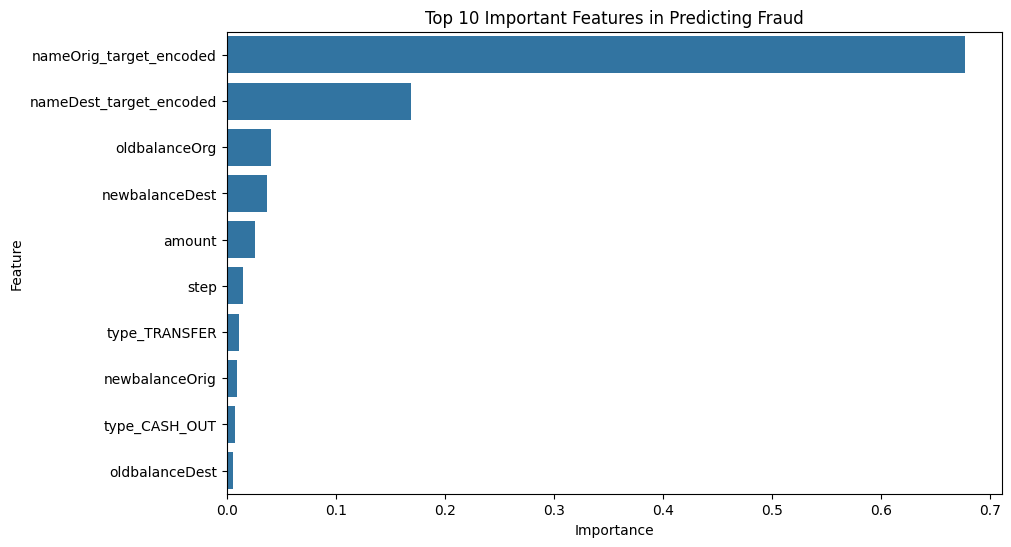

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title("Top 10 Important Features in Predicting Fraud")
plt.show()



### 5.Fraud Prevention Infrastructure
>Based on the insights from your analysis, the company should adopt security measures such as multi-factor authentication (MFA), real-time transaction monitoring, encryption protocols, and regular audits. The success of these preventive actions can be evaluated using key metrics like fraud rate reduction, customer feedback, and return on investment (ROI) analysis.